# Data Preprocessing

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [35]:
data = pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [38]:
print("Sex     : ",data.sex.unique())
print("Childern: ", data.children.unique())
print("Smoker  : ", data.smoker.unique())
print("Region  : ", data.region.unique())

Sex     :  ['female' 'male']
Childern:  [0 1 3 2 5 4]
Smoker  :  ['yes' 'no']
Region  :  ['southwest' 'southeast' 'northwest' 'northeast']


---
---

### Dealing with duplicate values

In [39]:
data.duplicated().sum()

1

In [40]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

---
---

### Dealing With missing values

In [41]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---
---

### Dealing with Categorical Values

In [42]:
data.sex = data.sex.map({'female': 0, 'male':1})
data.smoker = data.smoker.map({'yes': 1, 'no': 0})
data.region = data.region.map({'southwest': 0, 'southeast' : 1, 'northwest' :2 ,'northeast' : 3})

data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [43]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**Summary of Data Preprocessing:**

- **Objective:** Analyzing insurance data to determine premiums for individuals.
- **Dataset Characteristics:**
  - Contains 1337 rows and 7 columns.
  - Features include integer, float, and object data types.
- **Data Cleaning:**
  - Removed duplicate values from the dataset.
  - No missing values were observed after cleaning.
- **Handling Categorical Data:**
  - Categorical variables were encoded using ordinal encoding for further analysis.

# =================================

# EDA Analysis

<Axes: xlabel='age', ylabel='Density'>

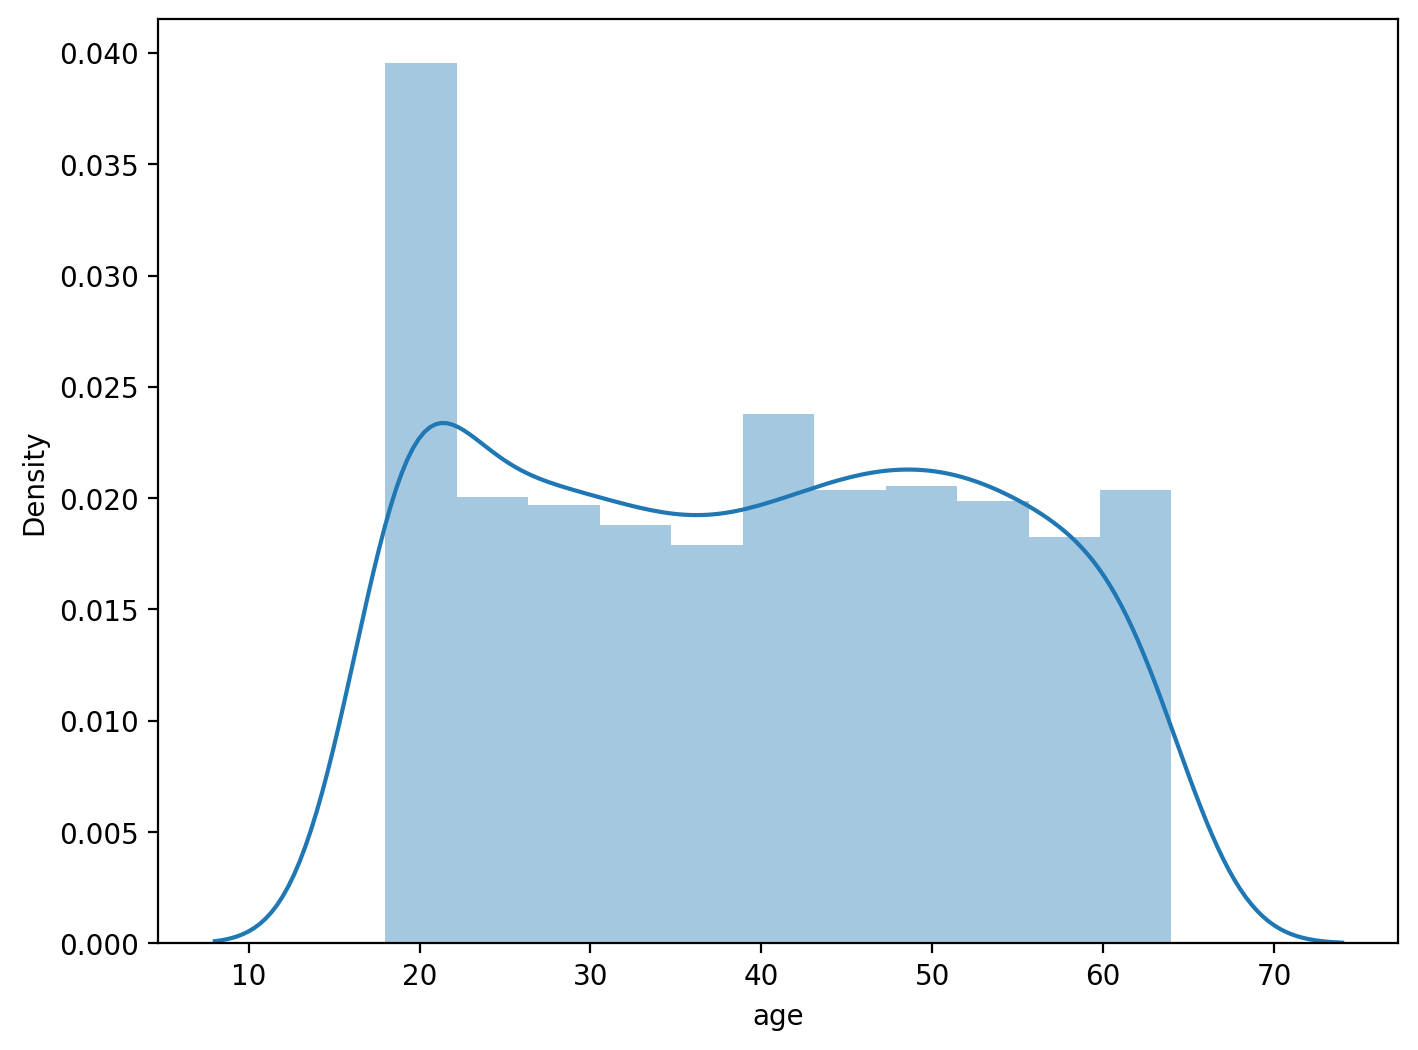

In [44]:
plt.figure(figsize=(8,6), dpi=200)
sns.distplot(data.age)

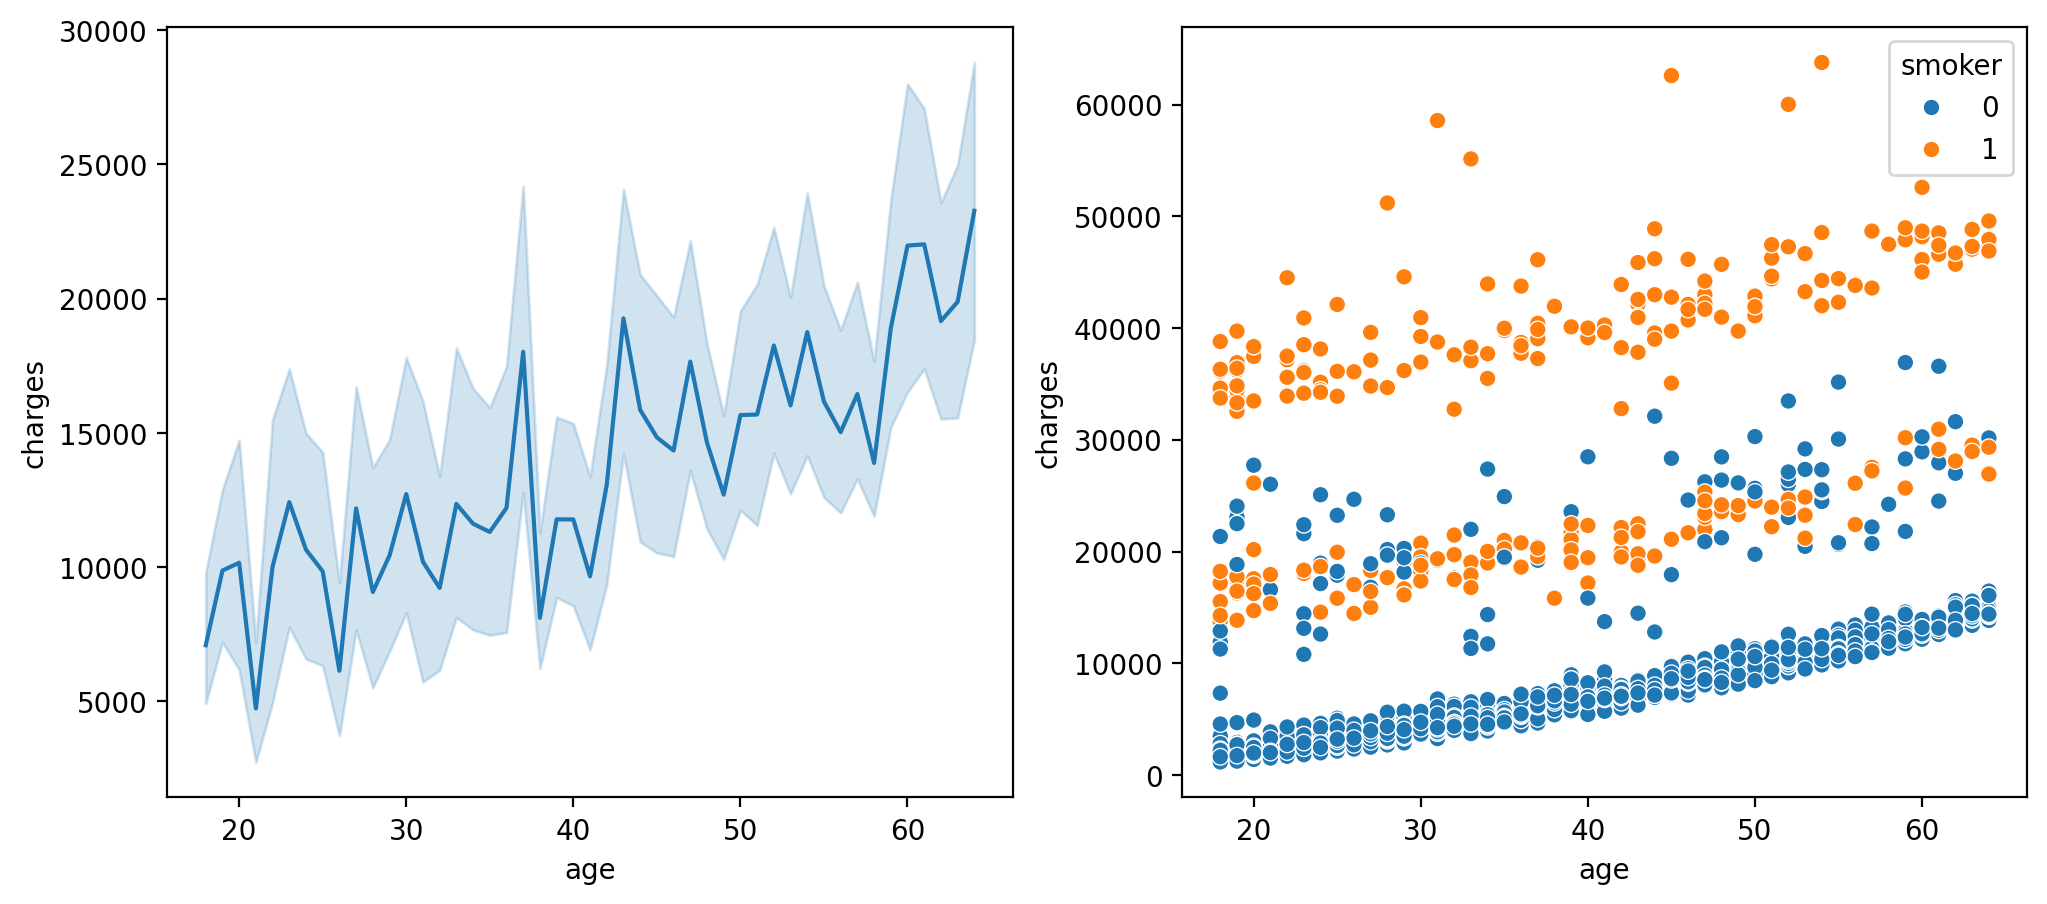

In [45]:
plt.figure(figsize=(12,5),dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x='age',y='charges', data=data)

plt.subplot(1,2,2)
sns.scatterplot(x='age',y='charges', hue='smoker', data=data, )

plt.show()

---
---

1    675
0    662
Name: sex, dtype: int64


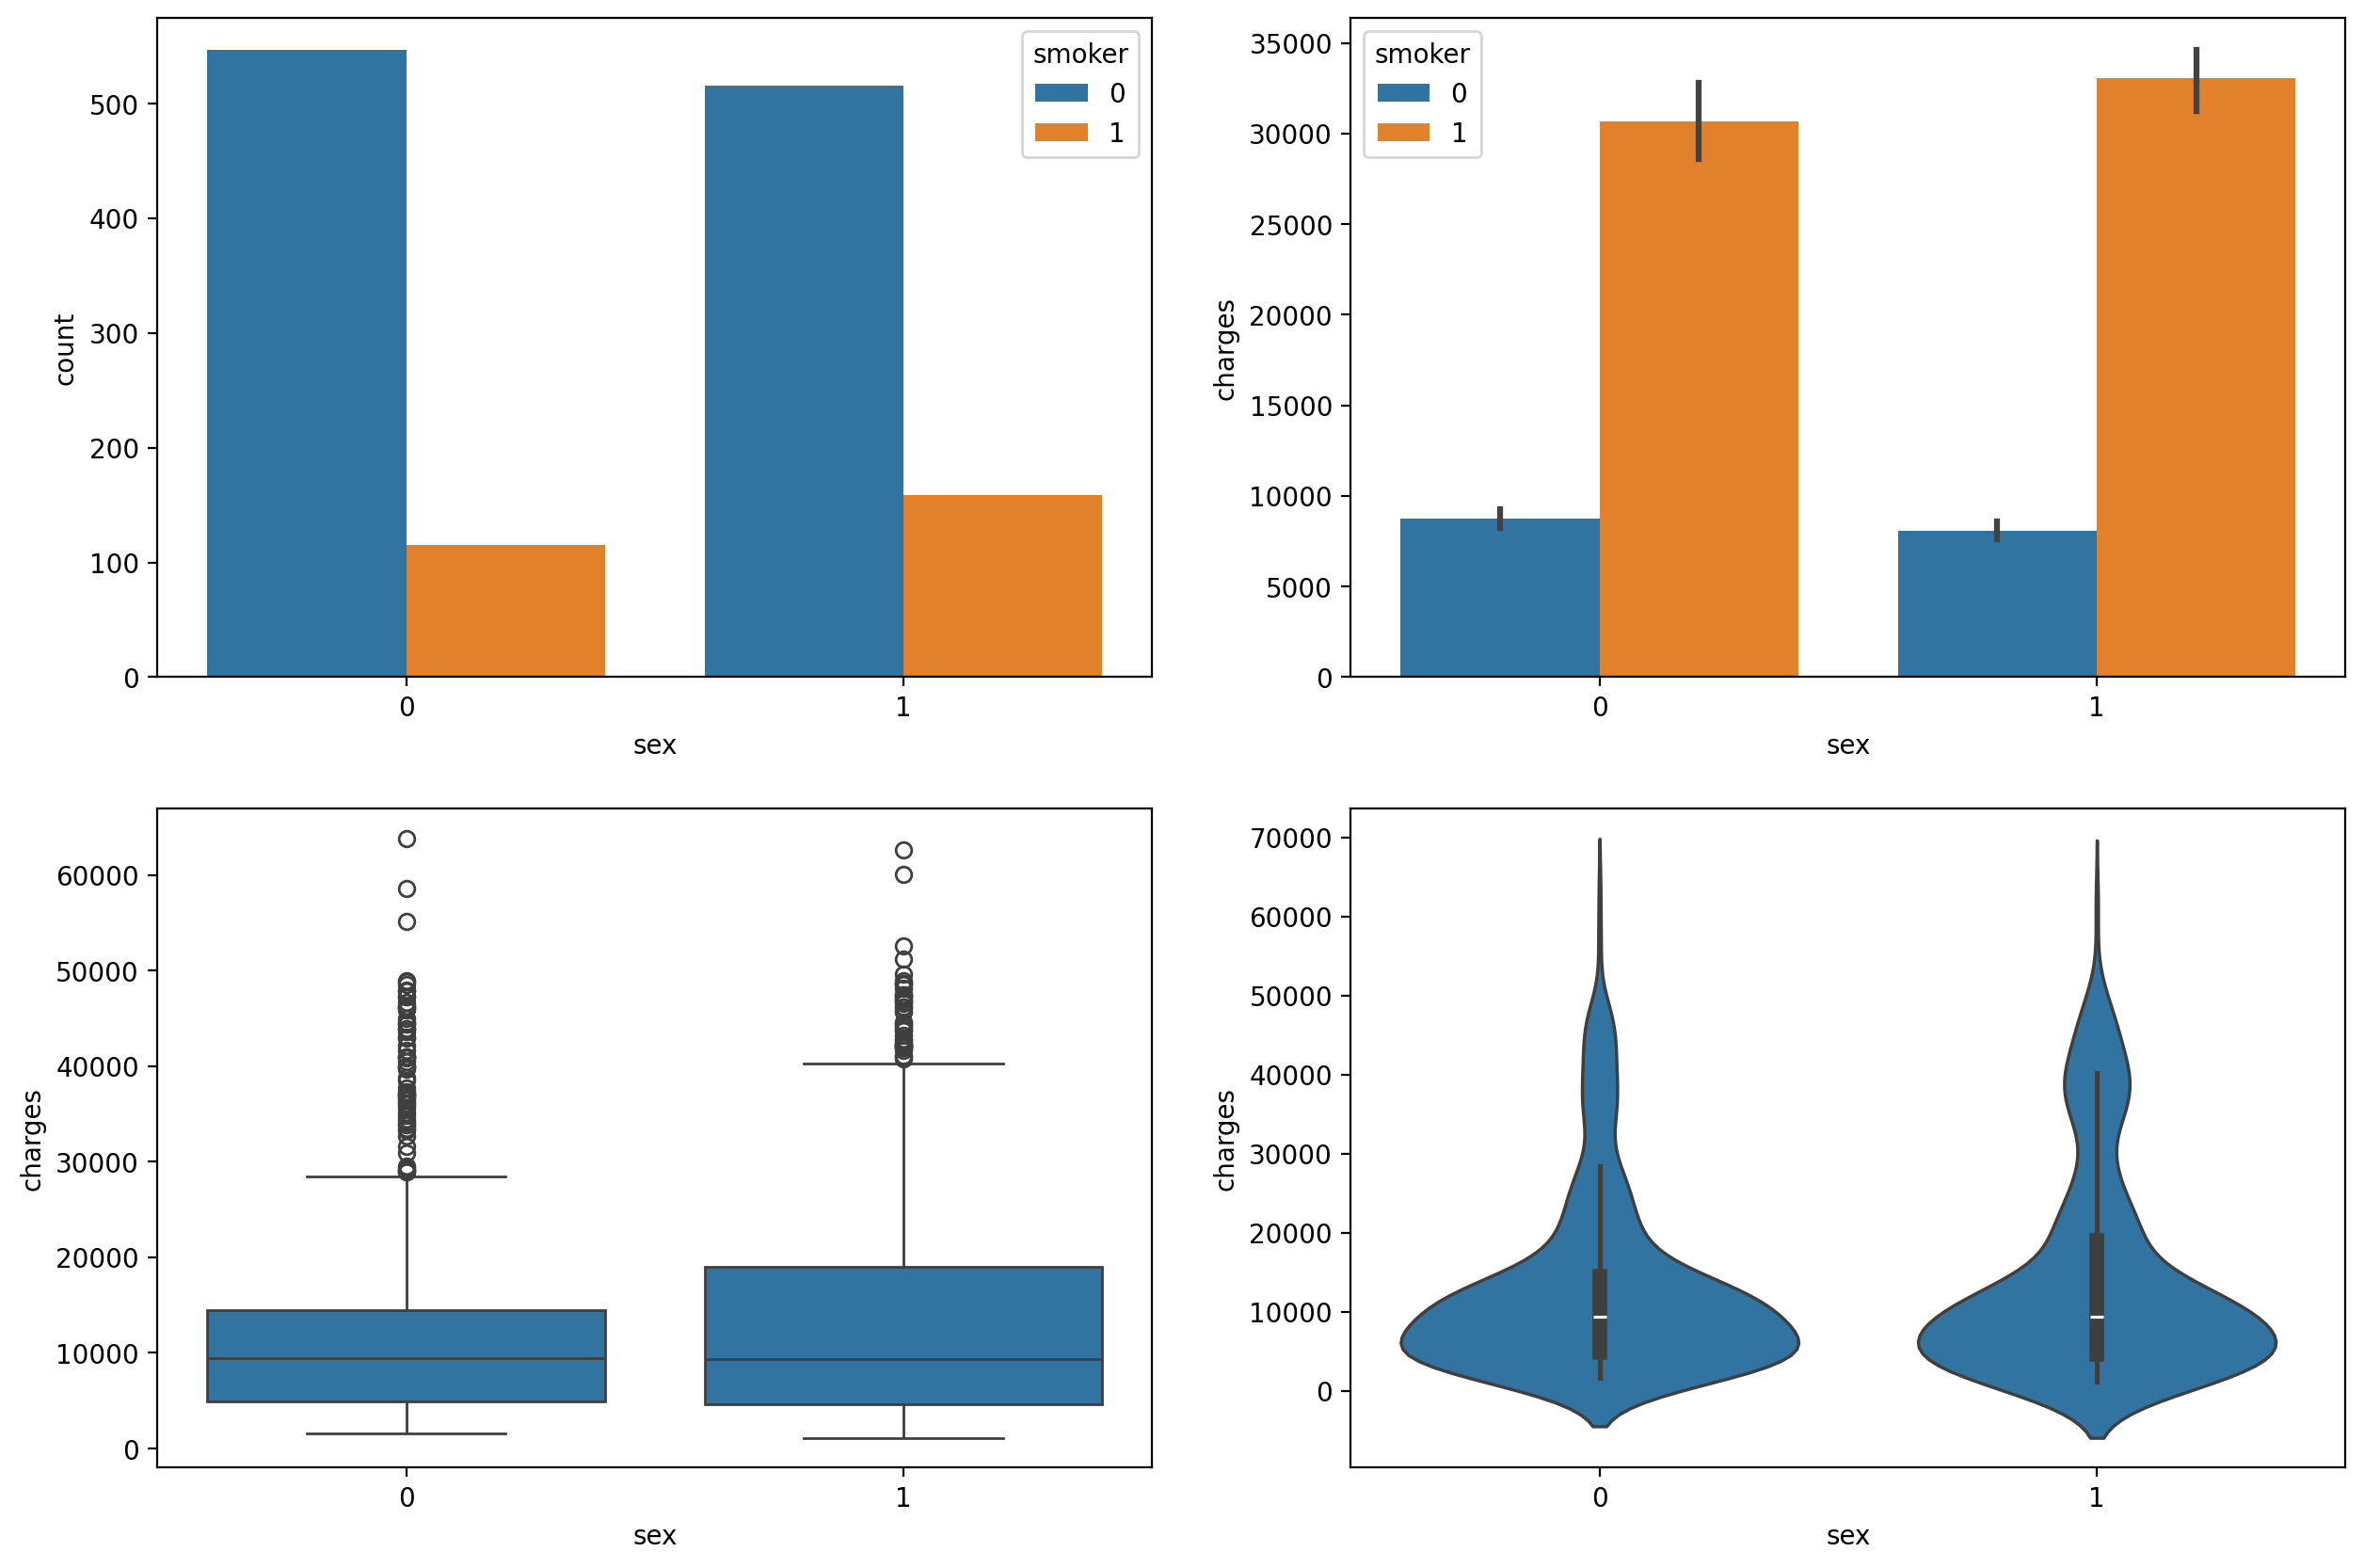

In [46]:
plt.figure(figsize=(15,10),dpi=200)


plt.subplot(2,2,1)
sns.countplot(x = 'sex', hue='smoker', data=data)

plt.subplot(2,2,2)
sns.barplot(x='sex',y='charges',hue='smoker', data=data)

plt.subplot(2,2,3)
sns.boxplot(x='sex',y='charges', data=data)

plt.subplot(2,2,4)
sns.violinplot(x='sex',y='charges', data=data)

print(data['sex'].value_counts())

plt.show()

---
---

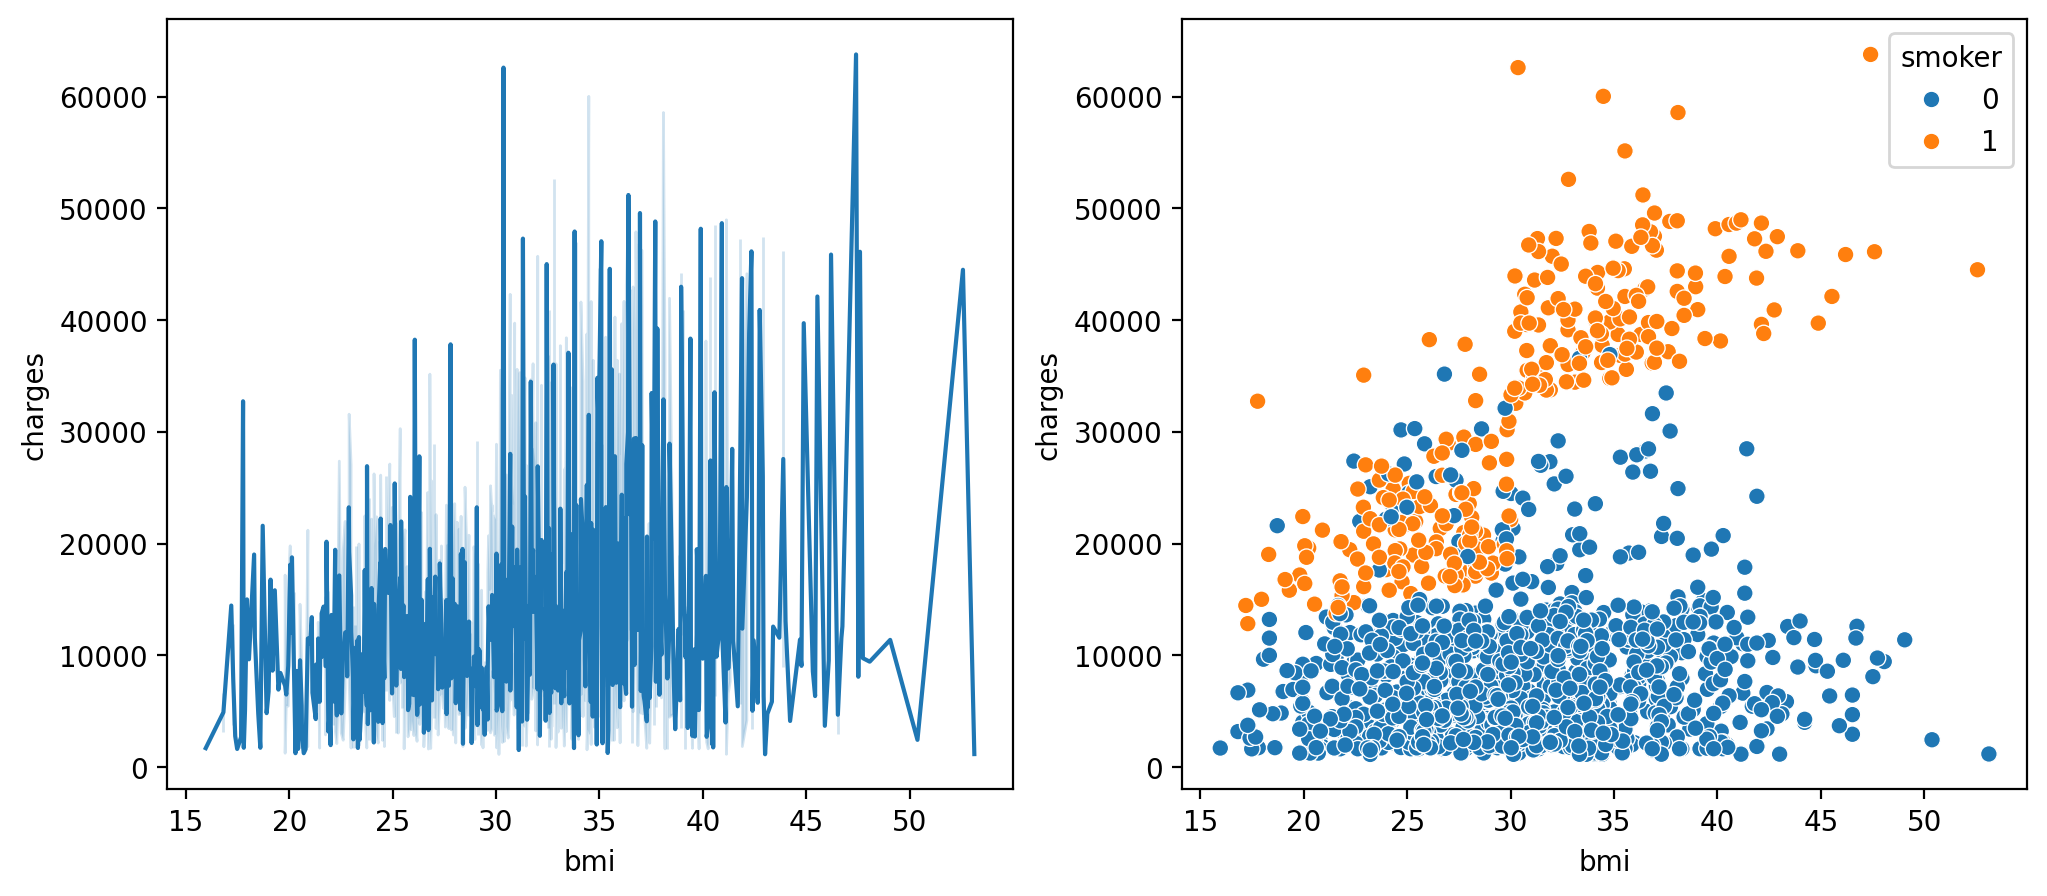

In [47]:
plt.figure(figsize=(12,5),dpi=200)

plt.subplot(1,2,1)
sns.lineplot(x='bmi',y='charges', data=data)

plt.subplot(1,2,2)
sns.scatterplot(x='bmi',y='charges', hue='smoker', data=data, )

plt.show()

---
---

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


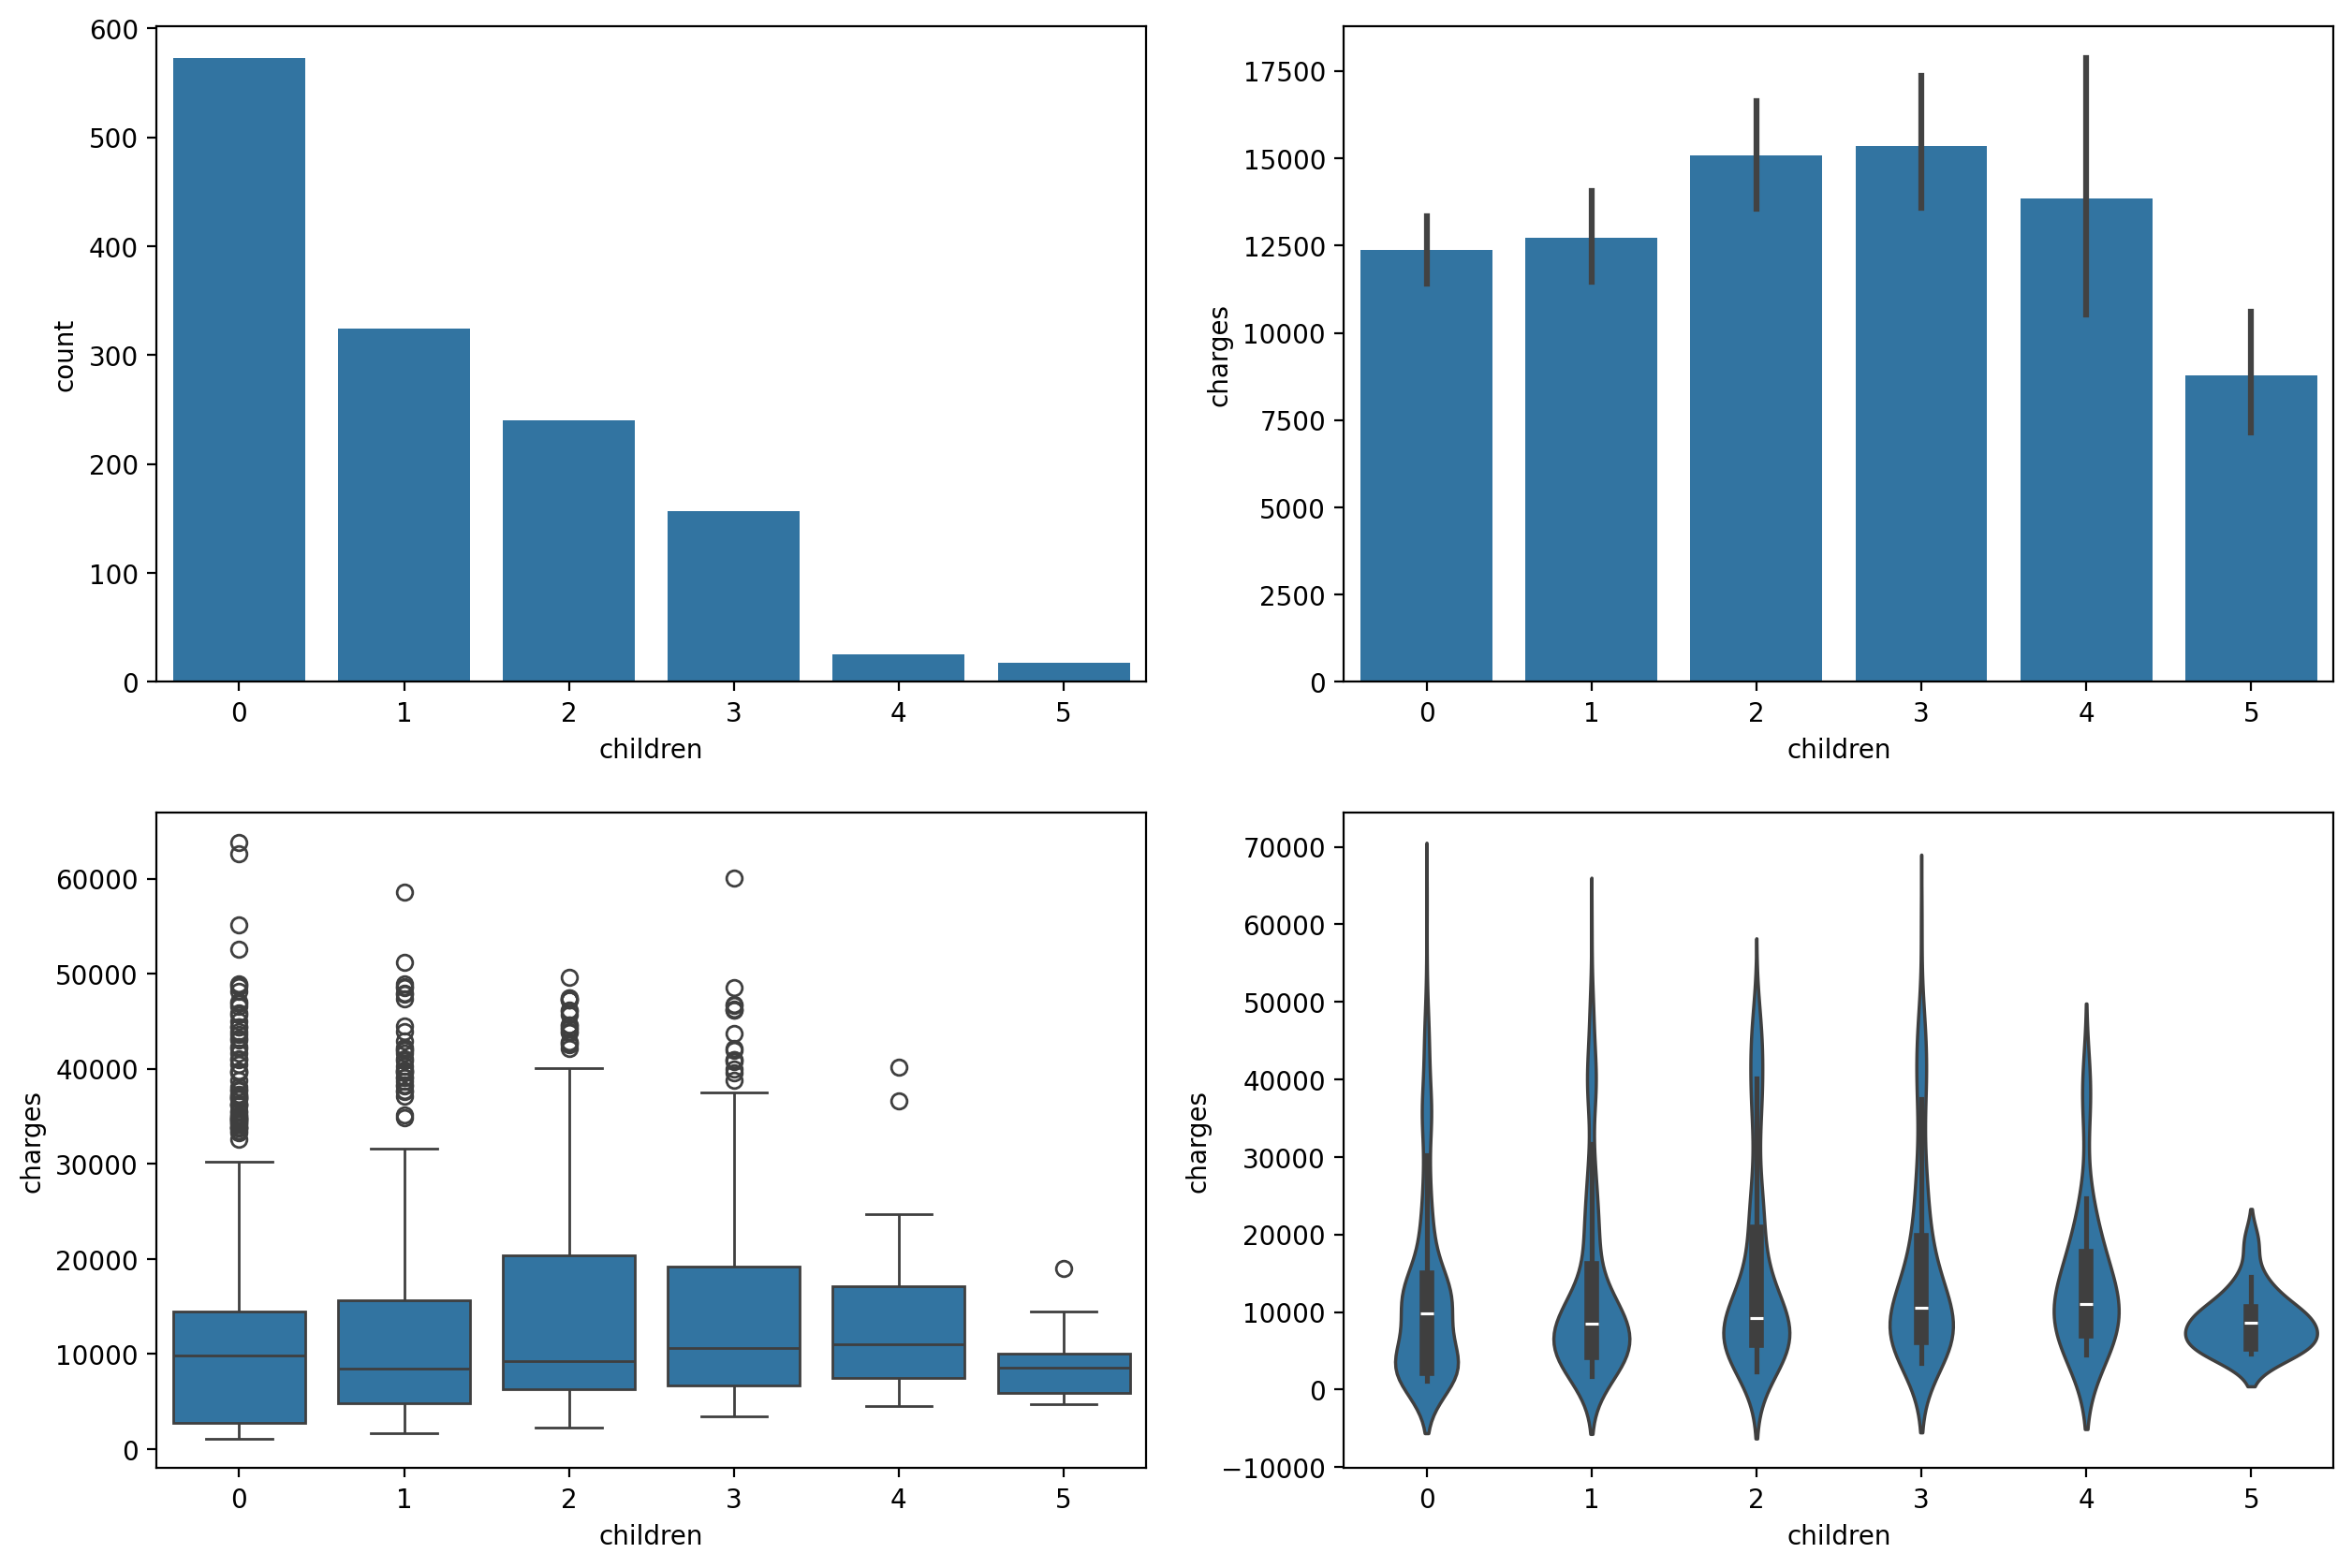

In [48]:
plt.figure(figsize=(15,10),dpi=200)


plt.subplot(2,2,1)
sns.countplot(x = 'children', data=data)

plt.subplot(2,2,2)
sns.barplot(x='children',y='charges', data=data)

plt.subplot(2,2,3)
sns.boxplot(x='children',y='charges', data=data)

plt.subplot(2,2,4)
sns.violinplot(x='children',y='charges', data=data)

print(data['children'].value_counts())

plt.show()

---
---

0    1063
1     274
Name: smoker, dtype: int64


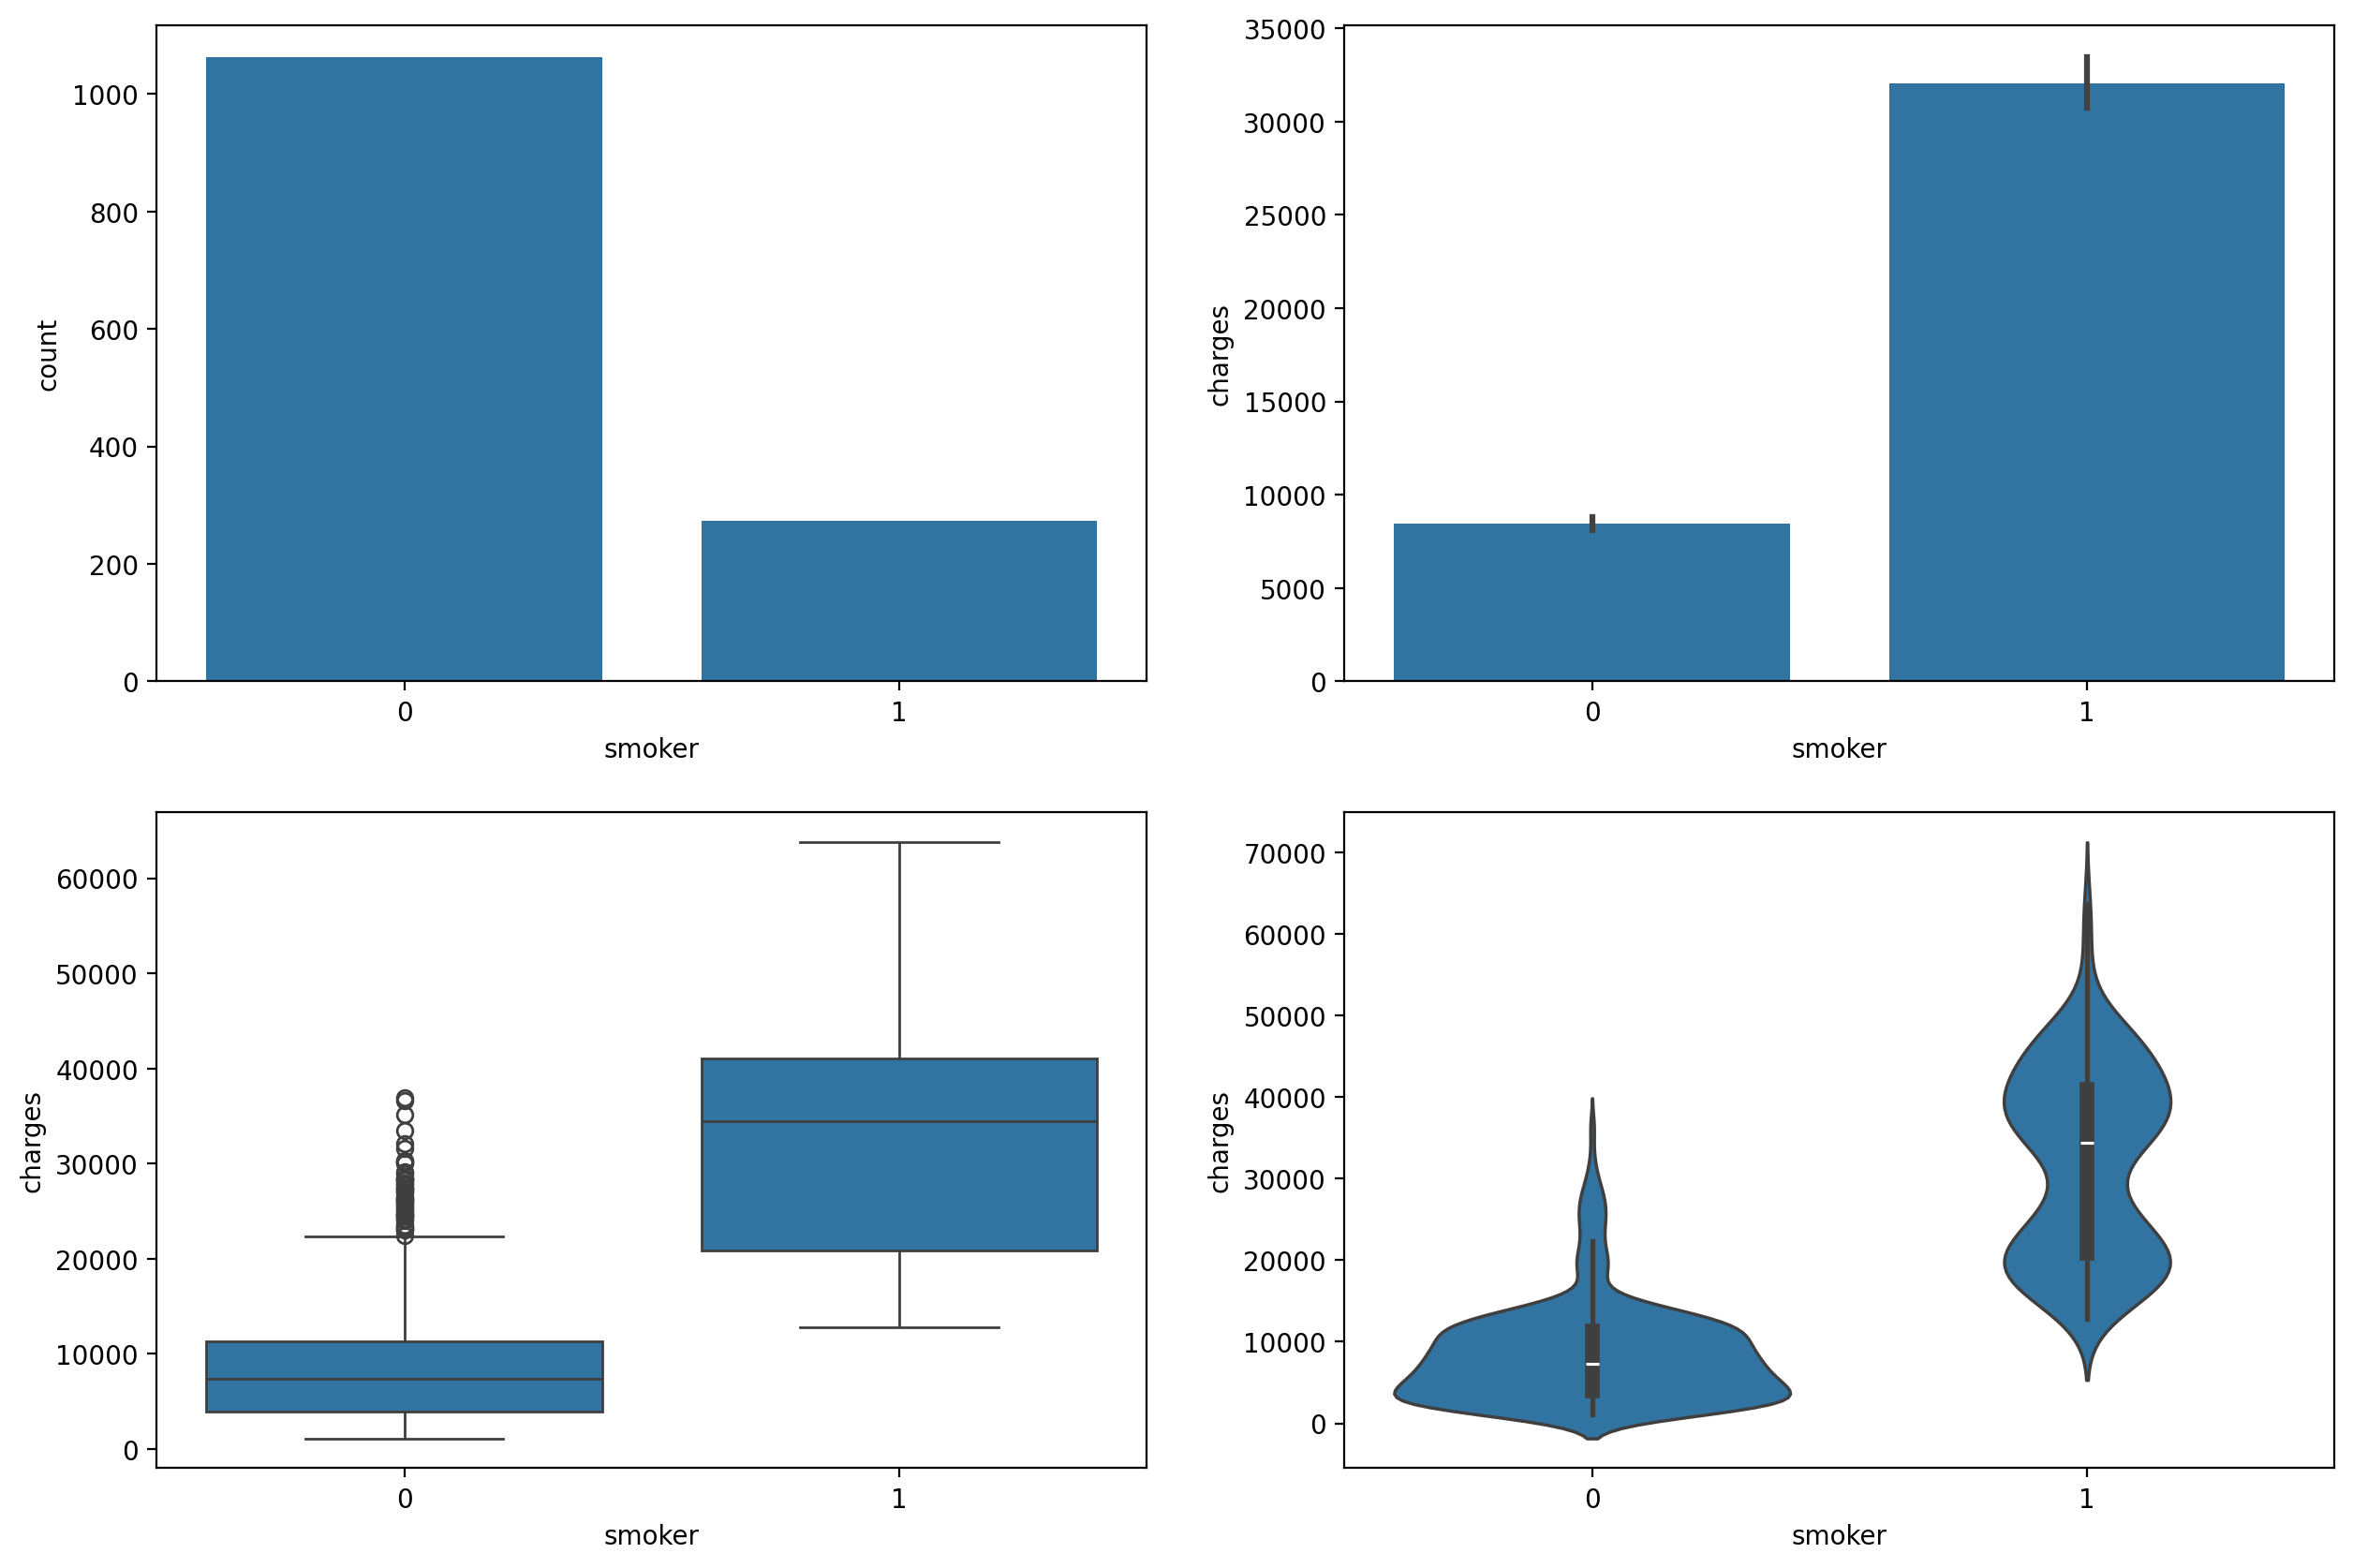

In [49]:
plt.figure(figsize=(15,10),dpi=200)


plt.subplot(2,2,1)
sns.countplot(x = 'smoker', data=data)

plt.subplot(2,2,2)
sns.barplot(x='smoker',y='charges', data=data)

plt.subplot(2,2,3)
sns.boxplot(x='smoker',y='charges', data=data)

plt.subplot(2,2,4)
sns.violinplot(x='smoker',y='charges', data=data)

print(data['smoker'].value_counts())

plt.show()

---
---

1    364
0    325
2    324
3    324
Name: region, dtype: int64


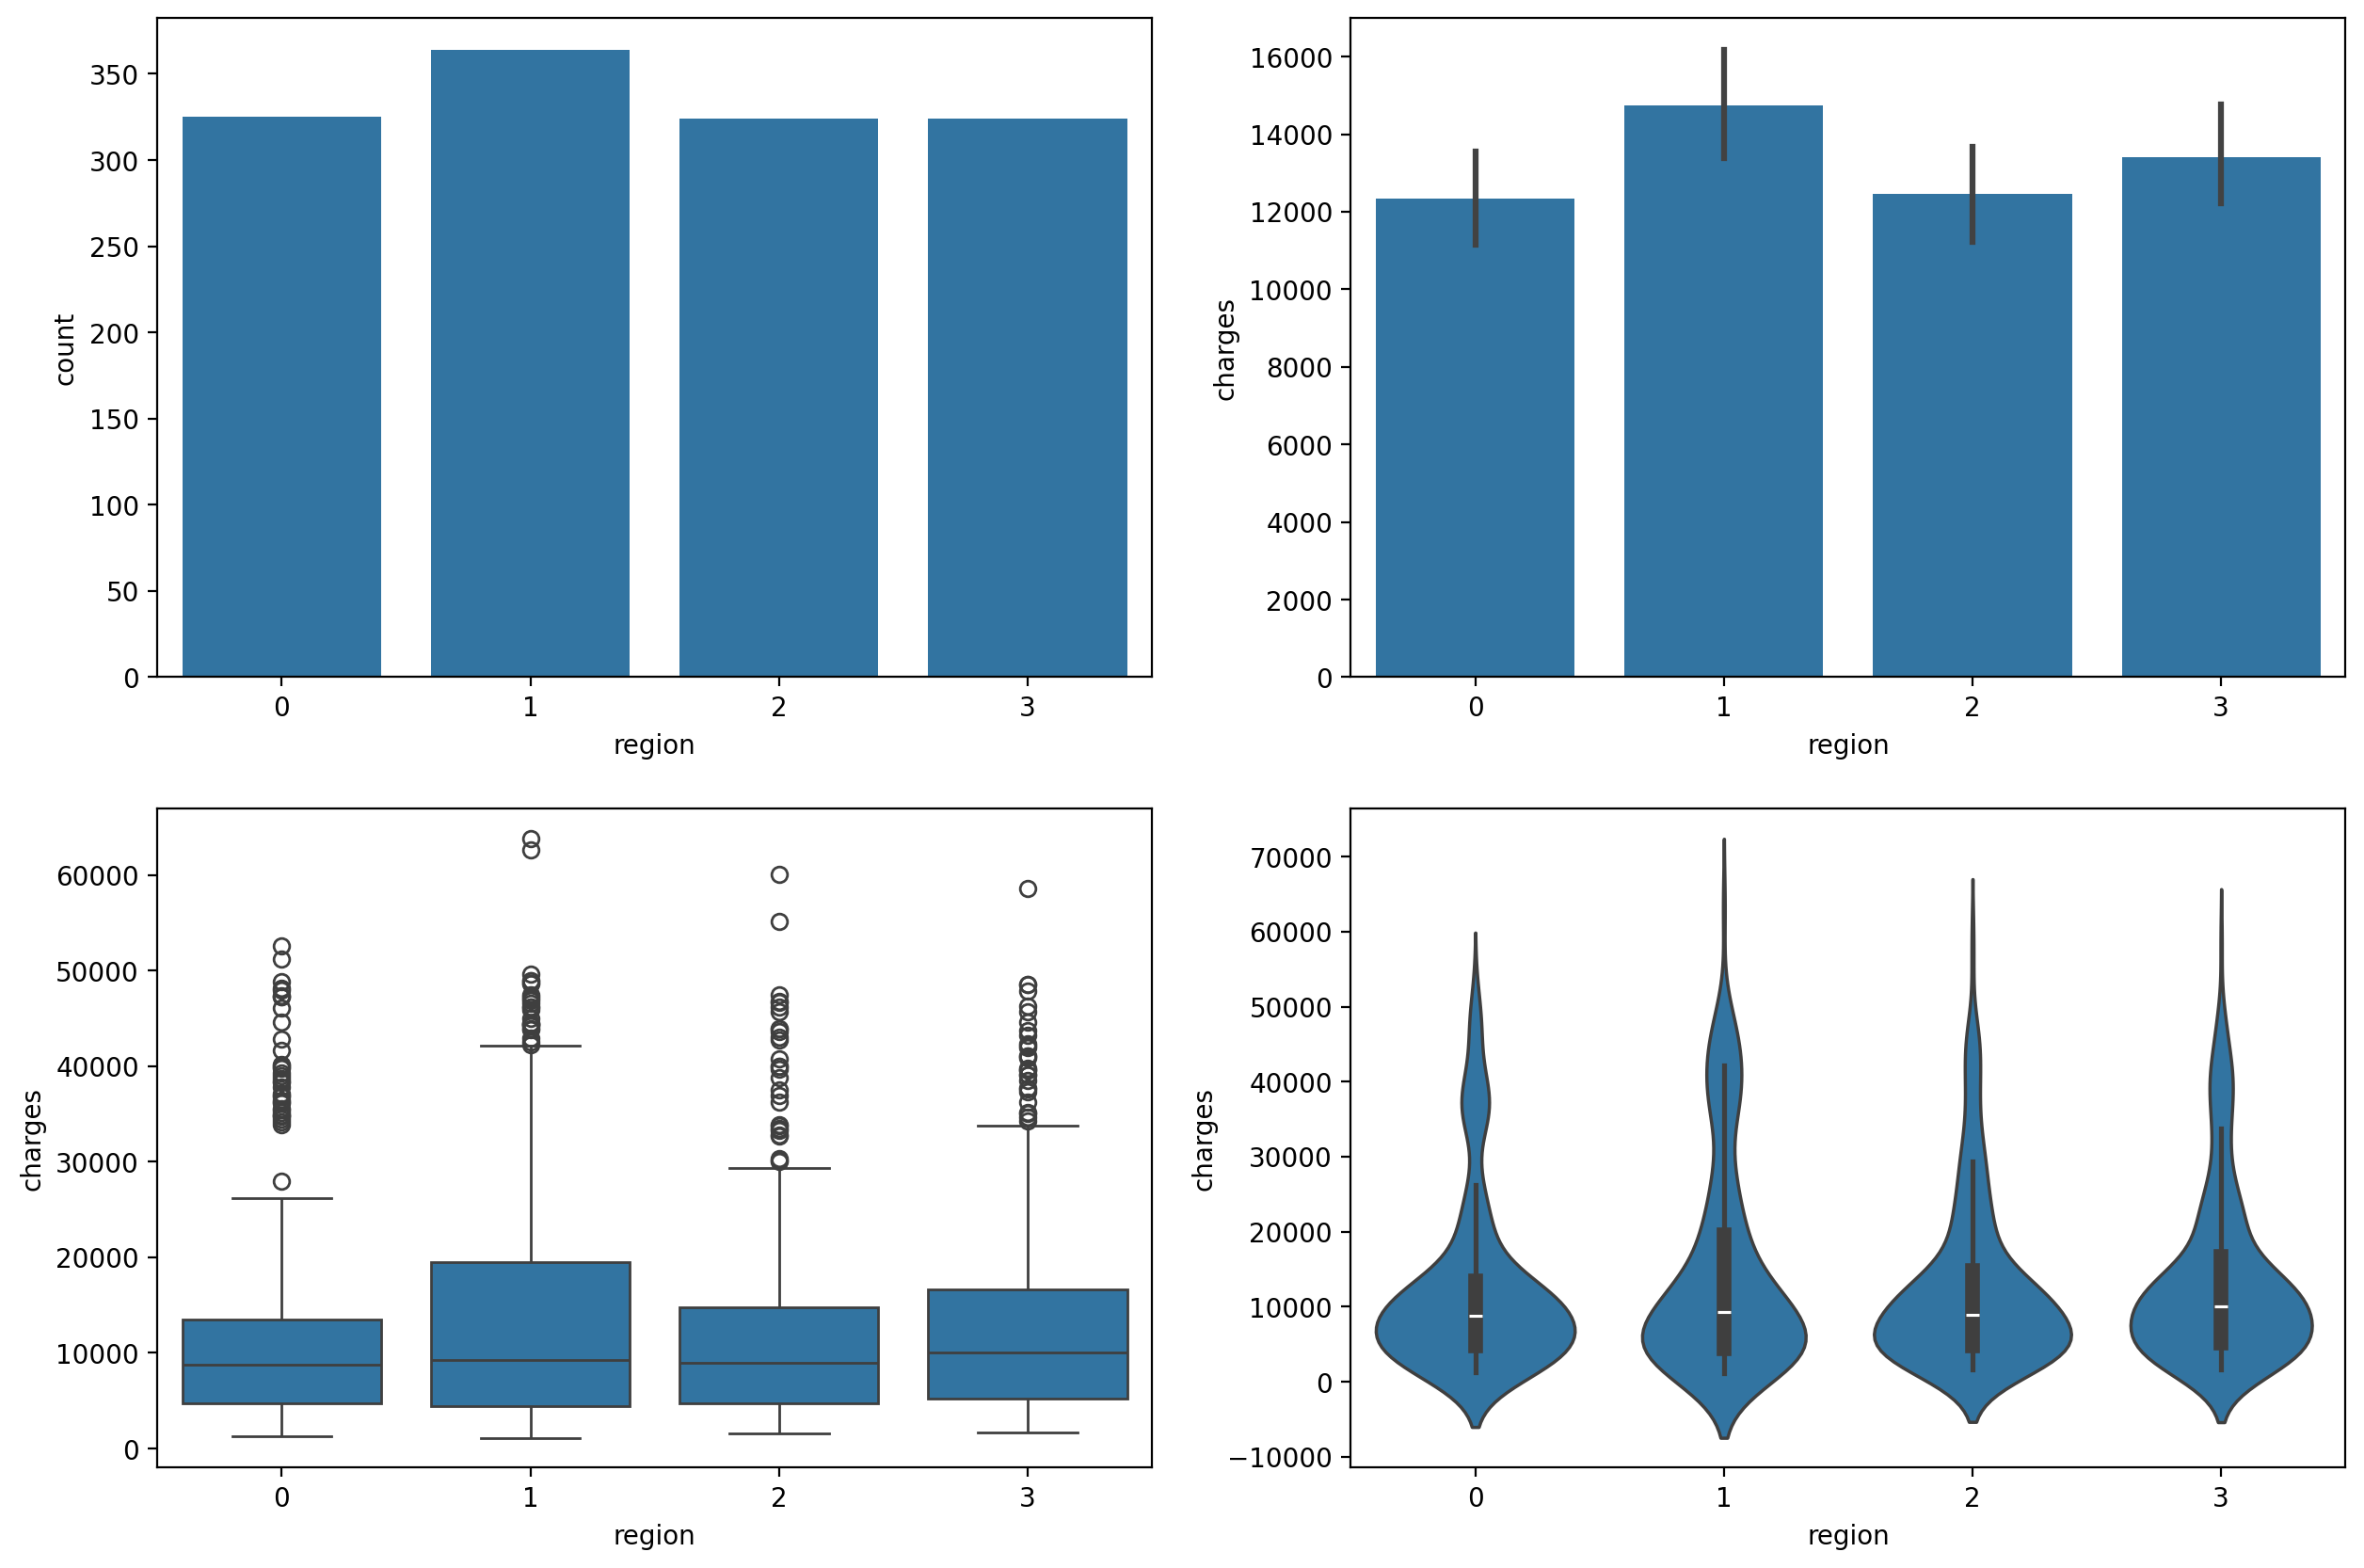

In [50]:
plt.figure(figsize=(15,10),dpi=200)


plt.subplot(2,2,1)
sns.countplot(x = 'region', data=data)

plt.subplot(2,2,2)
sns.barplot(x='region',y='charges', data=data)

plt.subplot(2,2,3)
sns.boxplot(x='region',y='charges', data=data)

plt.subplot(2,2,4)
sns.violinplot(x='region',y='charges', data=data)

print(data['region'].value_counts())

plt.show()

---
---

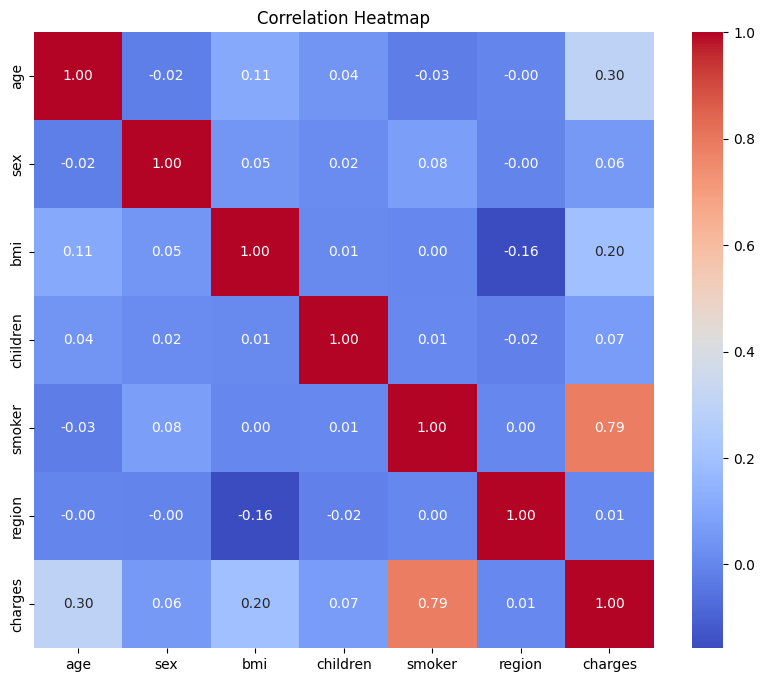

In [51]:
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region','charges']
corr_matrix = data[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

---
---

**Summary of EDA Analysis:**

- **Objective:** Conducted Exploratory Data Analysis (EDA) to understand the factors influencing insurance charges.
- **Age Analysis:**
  - Age distribution indicates a similar number of members between ages 30 to 60.
  - Positive correlation observed between age and insurance charges.
- **Gender Impact:**
  - Slight influence of gender on premium charges, with men generally having higher premiums than women.
- **BMI Influence:**
  - BMI (Body Mass Index) didn't show significant influence on predicting insurance charges.
- **Number of Children:**
  - Individuals with 2 to 3 children tend to have higher insurance charges compared to others.
- **Regional Variation:**
  - Region appears to have some influence on predicting insurance premiums.

# =================================

# Predictive Modelling

In [52]:
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
X = data[cols]
Y = data[['charges']]
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2


In [53]:
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


### Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['age','bmi']]= scaler.fit_transform(X[['age','bmi']])
X.head()

,age,sex,bmi,children,smoker,region
0,-1.440418,0,-0.453160,0,1,0
1,-1.511647,1,0.509422,1,0,1
2,-0.799350,1,0.383155,3,0,1
3,-0.443201,1,-1.305052,0,0,2
4,-0.514431,1,-0.292456,0,0,2


---
---

### Splitting the data into training and test sets

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [56]:
x_train.head()

,age,sex,bmi,children,smoker,region
1114,-1.155499,1,-1.009063,0,0,3
968,-1.297958,1,-0.806543,2,0,3
599,0.910164,0,1.125178,2,0,2
170,1.693691,1,1.772092,0,0,1
275,0.554015,0,-0.666338,2,0,3


In [57]:
y_train.head()

,charges
1114,2396.09590
968,3279.86855
599,33471.97189
170,13405.39030
275,9715.84100


In [58]:
x_test.head()

,age,sex,bmi,children,smoker,region
900,0.696474,1,-1.336209,0,0,3
1064,-0.728120,0,-0.830321,4,0,0
1256,0.838934,0,0.938238,3,0,2
298,-0.585661,1,0.611091,3,1,2
237,-0.585661,1,1.267024,2,0,1


In [59]:
y_test.head()

,charges
900,8688.85885
1064,5708.86700
1256,11436.73815
298,38746.35510
237,4463.20510


---
---

### Linear Regression

In [60]:
#Implimenting LinearRegression model for defined variable
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
evalution = []
lr = {}

#Define params grid
param_grid = {
    'fit_intercept':[True,False],
}

lr_model = LinearRegression()

#GridSearch with cross validation
grid_search = GridSearchCV(lr_model,param_grid,cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(x_train,y_train)

#Get best params
best_params = grid_search.best_params_
best_score = grid_search.best_score_

lr_model = LinearRegression(**best_params)
lr_model.fit(x_train,y_train)

y_pred_lr_train = lr_model.predict(x_train)
mae_lr_train = metrics.mean_absolute_error(y_train,y_pred_lr_train)
lr["MAE Train"] = round(mae_lr_train,2)

#Predicting result of xtest and evaluatin with MAE
y_pred_lr_test = lr_model.predict(x_test)
mae_lr_test = metrics.mean_absolute_error(y_test,y_pred_lr_test)
lr["MAE Test"] = round(mae_lr_test,2)

mse_lr_train = metrics.mean_squared_error(y_train,y_pred_lr_train)
lr["RMSE Train"] = round(mse_lr_train**0.5,2)

mse_lr_test = metrics.mean_squared_error(y_test,y_pred_lr_test)
lr["RMSE Test"] = round(mse_lr_test**0.5,2)

r2_lr_train = metrics.r2_score(y_train,y_pred_lr_train)
lr["R2 Square Train"] = round(r2_lr_train,2)

r2_lr_test = metrics.r2_score(y_test,y_pred_lr_test)
lr["R2 Square Test"] = round(r2_lr_train,2)

evalution.append(lr)
# Printing the results
print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)
print("\nTraining Set:")
print("MAE Score:", mae_lr_train)
print("RMSE Score:", mse_lr_train**0.5)
print("R2 Score:", r2_lr_train)
print("\nTesting Set:")
print("MAE Score:", mae_lr_test)
print("RMSE Score:", mse_lr_test**0.5)
print("R2 Score:", r2_lr_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'fit_intercept': True}
Best Score (neg_mean_squared_error): -37523328.967010155

Training Set:
MAE Score: 4181.321578104915
RMSE Score: 6083.217218554302
R2 Score: 0.7297182858804965

Testing Set:
MAE Score: 4182.353155288294
RMSE Score: 5957.608799816458
R2 Score: 0.8068466322629113


---
---

### Lasso Regression

In [61]:
#Implimenting LassoRegression model for defined variable
from sklearn.linear_model import Lasso
ls = {}

param_grid = {
    'alpha':[0.1,0.3,0.5,0.7,0.9],
    'fit_intercept':[True,False],
}

ls_model = Lasso()

#GridSearch with cross validation
grid_search = GridSearchCV(ls_model,param_grid,cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(x_train,y_train)

#Get best params
best_params = grid_search.best_params_
best_score = grid_search.best_score_

ls_model = Lasso(**best_params)
ls_model.fit(x_train,y_train)

y_pred_ls_train = ls_model.predict(x_train)
mae_ls_train = metrics.mean_absolute_error(y_train,y_pred_ls_train)
ls["MAE Train"] = round(mae_ls_train,2)

#Predicting result of xtest and evaluatin with MAE
y_pred_ls_test = ls_model.predict(x_test)
mae_ls_test = metrics.mean_absolute_error(y_test,y_pred_ls_test)
ls["MAE Test"] = round(mae_ls_test,2)

mse_ls_train = metrics.mean_squared_error(y_train,y_pred_ls_train)
ls["RMSE Train"] = round(mse_ls_train**0.5,2)

mse_ls_test = metrics.mean_squared_error(y_test,y_pred_ls_test)
ls["RMSE Test"] = round(mse_ls_test**0.5,2)

r2_ls_train = metrics.r2_score(y_train,y_pred_ls_train)
ls["R2 Square Train"] = round(r2_ls_train,2)

r2_ls_test = metrics.r2_score(y_test,y_pred_ls_test)
ls["R2 Square Test"] = round(r2_ls_train,2)

evalution.append(ls)
# Printing the results
print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)
print("\nTraining Set:")
print("MAE Score:", mae_ls_train)
print("RMSE Score:", mse_ls_train**0.5)
print("R2 Score:", r2_ls_train)
print("\nTesting Set:")
print("MAE Score:", mae_ls_test)
print("RMSE Score:", mse_ls_test**0.5)
print("R2 Score:", r2_ls_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'alpha': 0.9, 'fit_intercept': True}
Best Score (neg_mean_squared_error): -37522176.929416485

Training Set:
MAE Score: 4181.457388795442
RMSE Score: 6083.218223708673
R2 Score: 0.7297181965610267

Testing Set:
MAE Score: 4182.880498281941
RMSE Score: 5958.480514021322
R2 Score: 0.8067901039280478


---
---

### Decision Tree Regressor

In [62]:
#Implimenting LassoRegression model for defined variable
from sklearn.tree import DecisionTreeRegressor
dt = {}
dt_model = DecisionTreeRegressor()

param_grid = {
    'max_depth':[14,16,18,None],
    'min_samples_split':[1,2,4],
    'min_samples_leaf':[1,2,4]

}


dt_model = DecisionTreeRegressor()

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(x_train,y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

dt_model = DecisionTreeRegressor(**best_params)
dt_model.fit(x_train,y_train)

y_pred_dt_train = dt_model.predict(x_train)
mae_dt_train = metrics.mean_absolute_error(y_train,y_pred_dt_train)
dt["MAE Train"] = round(mae_dt_train,2)

#Predicting result of xtest and evaluatin with MAE
y_pred_dt_test = dt_model.predict(x_test)
mae_dt_test = metrics.mean_absolute_error(y_test,y_pred_dt_test)
dt["MAE Test"] = round(mae_dt_test,2)

mse_dt_train = metrics.mean_squared_error(y_train,y_pred_dt_train)
dt["RMSE Train"] = round(mse_dt_train**0.5,2)

mse_dt_test = metrics.mean_squared_error(y_test,y_pred_dt_test)
dt["RMSE Test"] = round(mse_dt_test**0.5,2)

r2_dt_train = metrics.r2_score(y_train,y_pred_dt_train)
dt["R2 Square Train"] = round(r2_dt_train,2)

r2_dt_test = metrics.r2_score(y_test,y_pred_dt_test)
dt["R2 Square Test"] = round(r2_dt_train,2)

evalution.append(dt)
# Printing the results
print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)
print("\nTraining Set:")
print("MAE Score:", mae_dt_train)
print("RMSE Score:", mse_dt_train**0.5)
print("R2 Score:", r2_dt_train)
print("\nTesting Set:")
print("MAE Score:", mae_dt_test)
print("RMSE Score:", mse_dt_test**0.5)
print("R2 Score:", r2_dt_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score (neg_mean_squared_error): -28629484.444634438

Training Set:
MAE Score: 1696.1628745995813
RMSE Score: 3406.0762266305346
R2 Score: 0.9152657983877311

Testing Set:
MAE Score: 2764.955030751244
RMSE Score: 5141.255205458014
R2 Score: 0.8561543793094243


---
---

### Random Forest Regressor

In [63]:
#Implimenting LassoRegression model for defined variable
from sklearn.ensemble import RandomForestRegressor
rf = {}
rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[14,16,18,None],
    'min_samples_split':[1,2,4],
    'min_samples_leaf':[1,2,4]

}

grid_search = GridSearchCV(rf_model,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=1)
grid_search.fit(x_train,y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

rf_model = RandomForestRegressor(**best_params)
rf_model.fit(x_train,y_train)

y_pred_rf_train = rf_model.predict(x_train)
mae_rf_train = metrics.mean_absolute_error(y_train,y_pred_rf_train)
rf["MAE Train"] = round(mae_rf_train,2)

#Predicting result of xtest and evaluatin with MAE
y_pred_rf_test = rf_model.predict(x_test)
mae_rf_test = metrics.mean_absolute_error(y_test,y_pred_rf_test)
rf["MAE Test"] = round(mae_rf_test,2)

mse_rf_train = metrics.mean_squared_error(y_train,y_pred_rf_train)
rf["RMSE Train"] = round(mse_rf_train**0.5,2)

mse_rf_test = metrics.mean_squared_error(y_test,y_pred_rf_test)
rf["RMSE Test"] = round(mse_rf_test**0.5,2)

r2_rf_train = metrics.r2_score(y_train,y_pred_rf_train)
rf["R2 Square Train"] = round(r2_rf_train,2)

r2_rf_test = metrics.r2_score(y_test,y_pred_rf_test)
rf["R2 Square Test"] = round(r2_rf_train,2)

evalution.append(rf)

# Printing the results
print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)
print("\nTraining Set:")
print("MAE Score:", mae_rf_train)
print("RMSE Score:", mse_rf_train**0.5)
print("R2 Score:", r2_rf_train)
print("Number of Estimators:", rf_model.n_estimators)
print("\nTesting Set:")
print("MAE Score:", mae_rf_test)
print("RMSE Score:", mse_rf_test**0.5)
print("R2 Score:", r2_rf_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (neg_mean_squared_error): -22443860.85360567

Training Set:
MAE Score: 1918.2454097827112
RMSE Score: 3507.0961086548414
R2 Score: 0.9101650458305903
Number of Estimators: 200

Testing Set:
MAE Score: 2458.7586380915645
RMSE Score: 4353.659188923487
R2 Score: 0.8968504879977266


### XGBoost Regressor

In [64]:
#Implimenting LassoRegression model for defined variable
from xgboost import XGBRegressor
xgb = {}
xgb_model = XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(xgb_model,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=1)
grid_search.fit(x_train,y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_


xgb_model = XGBRegressor(**best_params)
xgb_model.fit(x_train,y_train)

y_pred_xgb_train = xgb_model.predict(x_train)
mae_xgb_train = metrics.mean_absolute_error(y_train,y_pred_xgb_train)
xgb["MAE Train"] = round(mae_xgb_train,2)

#Predicting result of xtest and evaluatin with MAE
y_pred_xgb_test = xgb_model.predict(x_test)
mae_xgb_test = metrics.mean_absolute_error(y_test,y_pred_xgb_test)
xgb["MAE Test"] = round(mae_xgb_test,2)

mse_xgb_train = metrics.mean_squared_error(y_train,y_pred_xgb_train)
xgb["RMSE Train"] = round(mse_xgb_train**0.5,2)

mse_xgb_test = metrics.mean_squared_error(y_test,y_pred_xgb_test)
xgb["RMSE Test"] = round(mse_xgb_test**0.5,2)

r2_xgb_train = metrics.r2_score(y_train,y_pred_xgb_train)
xgb["R2 Square Train"] = round(r2_xgb_train,2)

r2_xgb_test = metrics.r2_score(y_test,y_pred_xgb_test)
xgb["R2 Square Test"] = round(r2_xgb_train,2)

evalution.append(xgb)
# Printing the results
print("Best Parameters:", best_params)
print("Best Score (neg_mean_squared_error):", best_score)
print("\nTraining Set:")
print("MAE Score:", mae_xgb_train)
print("RMSE Score:", mse_xgb_train**0.5)
print("R2 Score:", r2_xgb_train)
print("\nTesting Set:")
print("MAE Score:", mae_xgb_test)
print("RMSE Score:", mse_xgb_test**0.5)
print("R2 Score:", r2_xgb_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Score (neg_mean_squared_error): -21194849.94014179

Training Set:
MAE Score: 2323.1887717817103
RMSE Score: 4194.791512253055
R2 Score: 0.8714799822702748

Testing Set:
MAE Score: 2463.0096281903566
RMSE Score: 4232.217614392563
R2 Score: 0.9025247627660957


In [65]:
#Collecting result
columns = ['Linear Regression','Lasso Regression','Decision Tree Regressor','Random Forest Regressor','XGBoost Regressor']
eva_df = pd.DataFrame(evalution)
eva_df.index.name = 'Model Name'
eva_df

,MAE Train,MAE Test,RMSE Train,RMSE Test,R2 Square Train,R2 Square Test
Model Name,,,,,,
Linear Regression,4181.32,4182.35,6083.22,5957.61,0.73,0.73
Lasso Regression,4181.46,4182.88,6083.22,5958.48,0.73,0.73
Decision Tree Regressor,1696.16,2764.96,3406.08,5141.26,0.92,0.92
Random Forest Regressor,1918.25,2458.76,3507.10,4353.66,0.91,0.91
XGBoost Regressor,2323.19,2463.01,4194.79,4232.22,0.87,0.87


<Axes: title={'center': 'Result Analysis'}, xlabel='Model Name'>

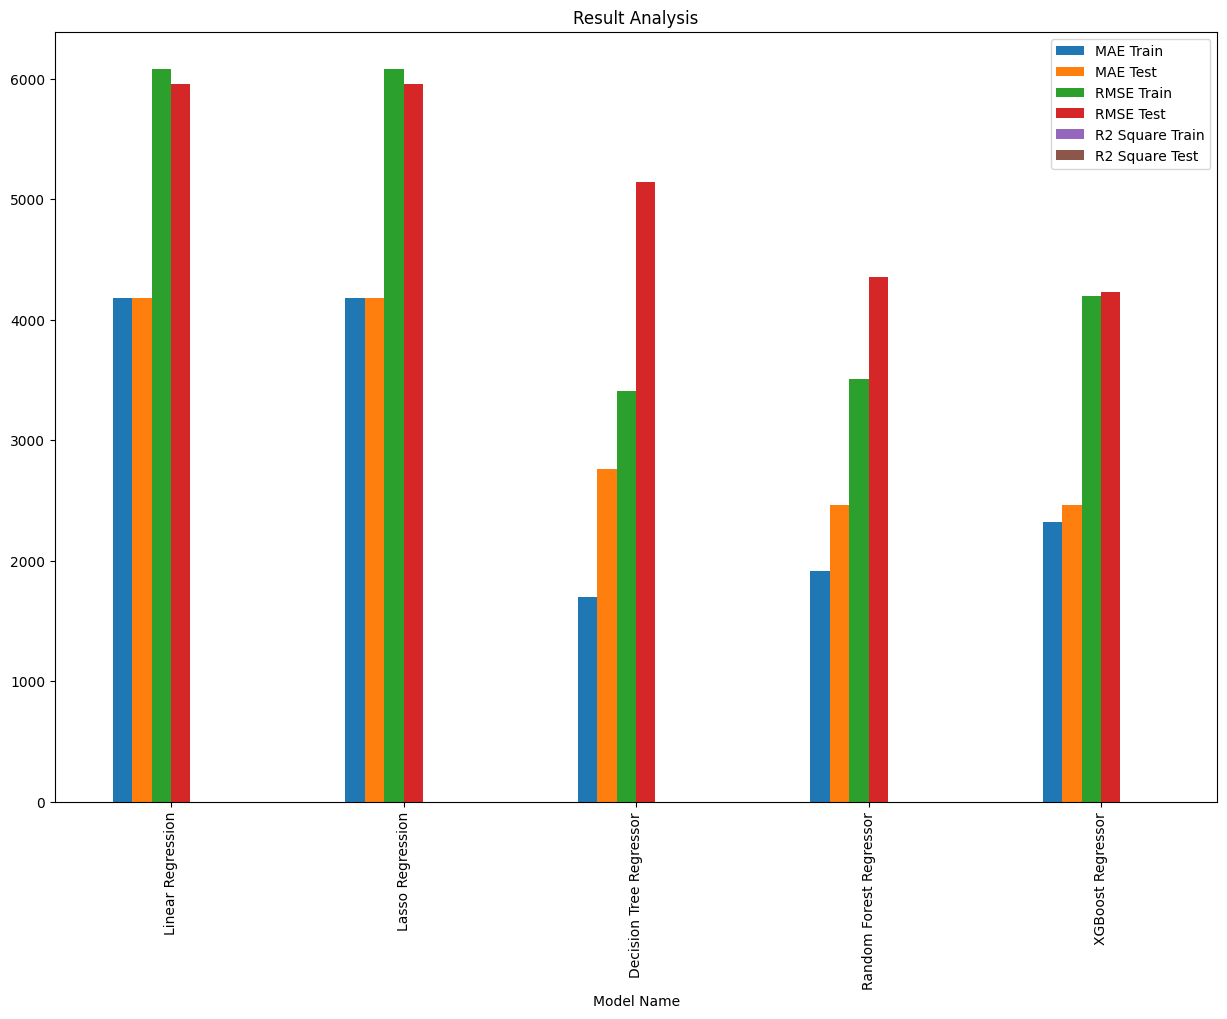

In [66]:
#Model selection by vizualization
eva_df.plot(kind='bar', title='Result Analysis', figsize=(15, 10))


**Summary of Model Training:**

- **Approach:**
  - Models were trained using GridSearchCV to find the best hyperparameters.
- **Models Used:**
  - Linear Regression
  - Lasso Regression
  - Decision Tree Regressor
  - RandomForest Regressor
  - XGBoost Regressor
- **Evaluation Metrics:**
  - Evaluated models using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) to assess performance.
- **Selection of Best Model:**
  - XGBoost Regressor demonstrated the lowest error based on evaluation metrics (MAE, MSE, R2), thus selected as the final model.

---
---

# ======================================

**Overall Summary of Premium Charges Prediction Project:**

1. **Objective:**
   - The goal of the project is to predict insurance premium charges for individuals based on various factors such as age, gender, BMI, number of children, and region.

2. **Data Preprocessing:**
   - Handled a dataset with 1337 rows and 7 columns containing integer, float, and object data types.
   - Identified and removed duplicate values and handled missing values appropriately.
   - Preprocessed categorical variables by encoding ordinal numbers.

3. **Exploratory Data Analysis (EDA):**
   - Conducted EDA to understand the relationship between different features and insurance charges.
   - Found that age, gender, number of children, and region have some influence on predicting insurance charges.

4. **Model Training:**
   - Employed various regression models including Linear Regression, Lasso Regression, Decision Tree Regressor, RandomForest Regressor, and XGBoost Regressor.
   - Utilized GridSearchCV to tune hyperparameters for each model.
   - Evaluated model performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2).

5. **Selection of Best Model:**
   - XGBoost Regressor was identified as the best-performing model based on the evaluation metrics, showcasing the lowest error rates.

6. **Conclusion:**
   - The XGBoost Regressor model was chosen as the final model for predicting insurance premium charges due to its superior performance in terms of accuracy and error minimization.
   - The project provides valuable insights into how different factors contribute to insurance charges and offers a reliable model for predicting premiums accurately.